In [3]:
import pandas as pd

# Загрузка даних
data = pd.read_csv('avocado.csv', delimiter=',', encoding='latin1')

# Видалення нульових значень
data = data.dropna()

# Вивід даних
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
from sklearn.preprocessing import StandardScaler

# Вибір двох стовпців по 1000 рядків для класетризації
data_for_clusterization = data[['Small Bags', 'Large Bags']][:1000]

# Нормалізація даних
scaler = StandardScaler()
data_for_clusterization = scaler.fit_transform(data_for_clusterization)

In [18]:
from sklearn.cluster import KMeans

# Кластеризація даних з допомогою алгоритму K-means
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(data_for_clusterization)
labels_kmeans = kmeans.labels_

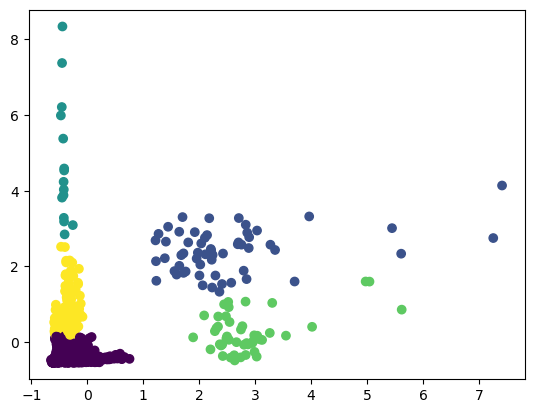

In [19]:
import matplotlib.pyplot as plt

# Візуалізація результату виконання алгоритму K-means
plt.scatter(data_for_clusterization[:, 0], data_for_clusterization[:, 1], c=labels_kmeans)
plt.show()

In [20]:
from sklearn_extra.cluster import KMedoids

# Кластеризація даних з допомогою алгоритму K-medoids
kmedoids = KMedoids(n_clusters=5)
kmedoids.fit(data_for_clusterization)
labels_kmedoids = kmedoids.labels_

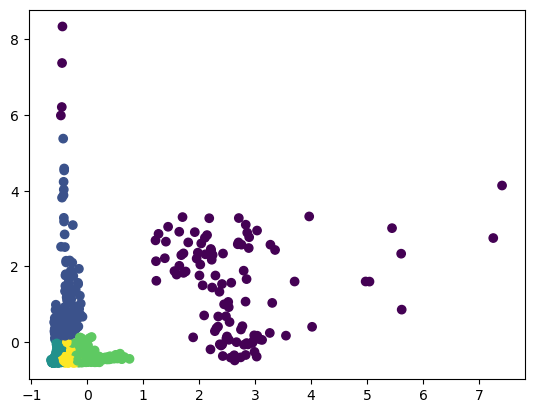

In [21]:
# Візуалізація результату виконання алгоритму K-medoids
plt.scatter(data_for_clusterization[:, 0], data_for_clusterization[:, 1], c=labels_kmedoids)
plt.show()

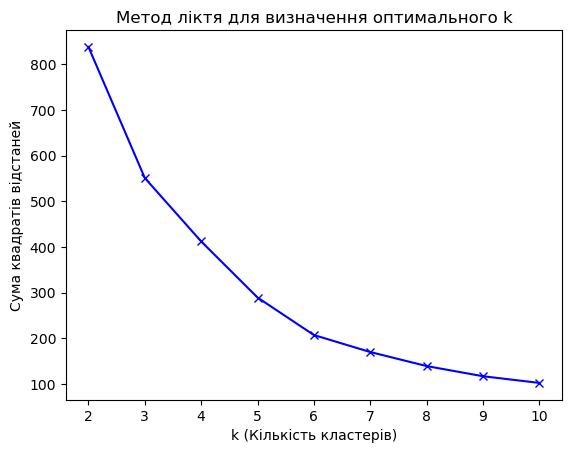

In [23]:
# Визначення оптимального значення кластерів для K-means, з допомогою методу локтя

# Список для збереження сум квадратів відстаней
sum_of_squared_distances = []

# Діапазон кількості кластерів
k_range = range(2, 11)

# Обчислення суми квадратів відстаней для різних значень k
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_for_clusterization)
    sum_of_squared_distances.append(kmeans.inertia_)

# Вивід результатів
plt.plot(k_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k (Кількість кластерів)')
plt.ylabel('Сума квадратів відстаней')
plt.title('Метод ліктя для визначення оптимального k')
plt.show()

# Згідно графіку можна побачити, що оптимальною кількістю є 7 кластерів, 
# в цій точці зменшення суми квадратів відстаней найменш замітне

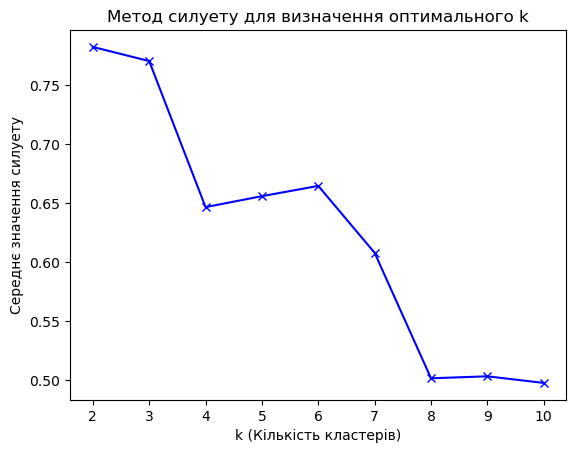

In [27]:
from sklearn.metrics import silhouette_score

# Визначення оптимального значення кластерів для K-means, з допомогою методу силуету

# Список для збереження середніх значень силуету
silhouette_scores = []

# Діапазон кількості кластерів
k_range = range(2, 11)

# Обчислення середніх значень силуету для різних значень k
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    cluster_labels = kmeans.fit_predict(data_for_clusterization)
    silhouette_avg = silhouette_score(data_for_clusterization, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Вивід результатів
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('k (Кількість кластерів)')
plt.ylabel('Середнє значення силуету')
plt.title('Метод силуету для визначення оптимального k')
plt.show()

# З графіку видно, що найвище середнє значення силуету для 2 кластерів,
# отже оптимальною кількістю кластерів є 2

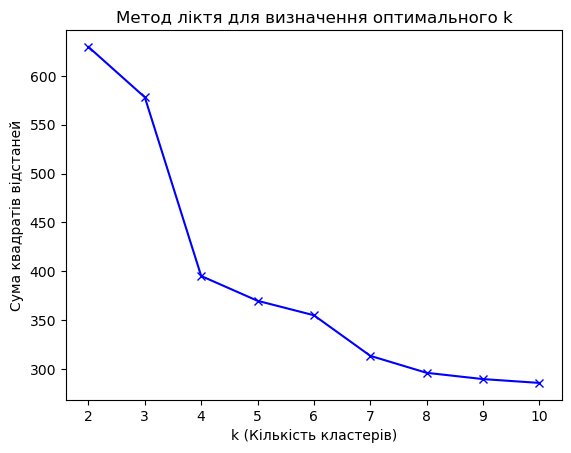

In [28]:
# Визначення оптимального значення кластерів для K-medoids, з допомогою методу локтя

# Список для збереження сум квадратів відстаней
sum_of_squared_distances = []

# Діапазон кількості кластерів
k_range = range(2, 11)

# Обчислення суми квадратів відстаней для різних значень k
for k in k_range:
    kmedoids = KMedoids(n_clusters=k)
    kmedoids.fit(data_for_clusterization)
    sum_of_squared_distances.append(kmedoids.inertia_)

# Вивід результатів
plt.plot(k_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k (Кількість кластерів)')
plt.ylabel('Сума квадратів відстаней')
plt.title('Метод ліктя для визначення оптимального k')
plt.show()

# Згідно графіку можна побачити, що оптимальною кількістю є 9 кластерів, 
# в цій точці зменшення суми квадратів відстаней найменш замітне

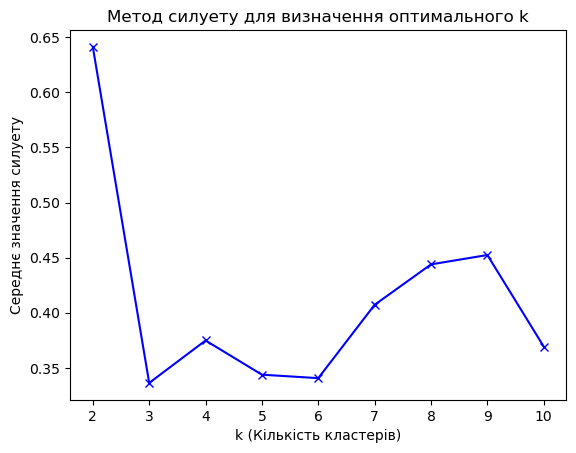

In [29]:
# Визначення оптимального значення кластерів для K-medoids, з допомогою методу силуету

# Список для збереження середніх значень силуету
silhouette_scores = []

# Діапазон кількості кластерів
k_range = range(2, 11)

# Обчислення середніх значень силуету для різних значень k
for k in k_range:
    kmedoids = KMedoids(n_clusters=k)
    cluster_labels = kmedoids.fit_predict(data_for_clusterization)
    silhouette_avg = silhouette_score(data_for_clusterization, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Вивід результатів
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('k (Кількість кластерів)')
plt.ylabel('Середнє значення силуету')
plt.title('Метод силуету для визначення оптимального k')
plt.show()

# З графіку видно, що найвище середнє значення силуету для 2 кластерів,
# отже оптимальною кількістю кластерів є 2

In [34]:
# Оцінка якості кластерів K-means

# Оцінка суми квадратів відстаней в кластерах
inertia = kmeans.inertia_
print(f"Чим ближче значення до 0 - тим краща кластеризація")
print(f"Inertia: {inertia}")

# Оцінка коефіцієнта силуету
cluster_labels = kmeans.fit_predict(data_for_clusterization)
silhouette_avg = silhouette_score(data_for_clusterization, cluster_labels)
print(f"")
print(f"Чим ближче значення до 1 - тим краща кластеризація, чим ближче до -1 - тим гірша")
print(f"Silhouette Score: {silhouette_avg}")

Чим ближче значення до 0 - тим краща кластеризація
Inertia: 102.00938823153953

Чим ближче значення до 1 - тим краща кластеризація, чим ближче до -1 - тим гірша
Silhouette Score: 0.49790008922448165


In [35]:
# Оцінка якості кластерів K-medoids

# Оцінка суми квадратів відстаней в кластерах
inertia = kmedoids.inertia_
print(f"Чим ближче значення до 0 - тим краща кластеризація")
print(f"Inertia: {inertia}")

# Оцінка коефіцієнта силуету
cluster_labels = kmedoids.fit_predict(data_for_clusterization)
silhouette_avg = silhouette_score(data_for_clusterization, cluster_labels)
print(f"")
print(f"Чим ближче значення до 1 - тим краща кластеризація, чим ближче до -1 - тим гірша")
print(f"Silhouette Score): {silhouette_avg}")

Чим ближче значення до 0 - тим краща кластеризація
Inertia: 285.608234769154

Чим ближче значення до 1 - тим краща кластеризація, чим ближче до -1 - тим гірша
Silhouette Score): 0.369362421654399


In [41]:
import cv2
import numpy as np

# Завантаження зображення
image = cv2.imread('image_for_clusterization.jpeg')

# Перетворення зображення на 2D масив пікселів
pixels = image.reshape(-1, 3)

# Сегментація кольорів з допомогою K-means
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(pixels)

# Mітки кластерів для кожного пікселя
labels = kmeans.predict(pixels)

# Створення нового зображення, замінюючи кожен піксель кольором кластера
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)

# Збережіть сегментоване зображення
cv2.imwrite('segmented_image.jpg', segmented_image)

True